#Assignment 2: Support Vector Machines

Group members:

1.   Hiep Huynh
2.   Duy Tran
3.   Dan Vu
4.   Dinh Nguyen

##Part 1: Familiarization and Basic Testing of the SVM Algorithm (6 pts)

1. Dataset Selection (2 pts): Use the same dataset selected for Assignment 1 (kNN) to apply SVM classification. This will allow you to compare the performance and results of kNN and SVM on the same data.
2. Algorithm Application (2 pts):
Run the SVM algorithm on the selected dataset. Use the sklearn version.
Experiment with different kernels (e.g., linear or polynomial) and observe their effects.
3. Use Case Identification (2 pts):
List two real-world applications of SVM, particularly in fields where SVM’s high-dimensional classification ability is beneficial (e.g., text categorization etc).

##Part 2: In-Depth Experimentation with the SVM Algorithm (4 pts)

1. Parameter Experimentation (2 pts):
Experiment with various parameter values for SVM (e.g., C value) and observe changes in model performance.
2. Kernel Comparison (2 pts):
Compare the model’s performance using at least two different SVM kernels (e.g., linear vs. Polynomial) on the same dataset.


# Part 1: Familiarization and Basic Testing of the SVM Algorithm

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")

### Dataset Selection & Data Preprocessing
We use the same Diabetes Predictive dataset selected for Assignment 1 (kNN) to apply SVM classification. After loading the data, we:

*   Create a subset.
*   Separate features (x) and target (y) variables.
*   Visualize the dataset.
*   Split the dataset into training and testing sets (test size 0.2).

In [ ]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/hiephamk/Data_Group_Project/main/diabetes_prediction_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# Create a subset
df = df.sample(n=10000, random_state=0)

In [ ]:
# Separate features (x) and target (y)
# Use only 2 features: bmi and blood_glucose_level
x = df.loc[:, ['bmi', 'blood_glucose_level']]
y = df.iloc[:, -1:].squeeze()

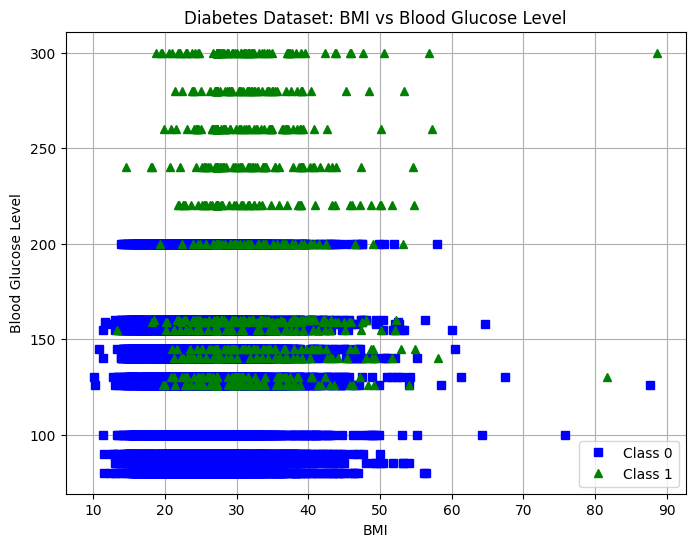

In [ ]:
# Visualize the dataset with these 2 features
plt.figure(figsize=(8, 6))
plt.plot(x[y == 0]['bmi'], x[y == 0]['blood_glucose_level'], 'bs', label='Class 0')
plt.plot(x[y == 1]['bmi'], x[y == 1]['blood_glucose_level'], 'g^', label='Class 1')
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.title('Diabetes Dataset: BMI vs Blood Glucose Level')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Scale numeric features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split data into training and testing sets (80-20)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

### SVM Algorithm Application
We use both Linear and Polynomial kernels to apply the SVM method to the Diabetes Predictive dataset.

*   Create SVM models with these 2 kernels and train these models on our training data.
*   Use the trained models to predict on our test data.
*   Evaluate each models' performance based on metrics of classification report, and confusion matrix.

In [ ]:
# Train SVMs with Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(x_train, y_train)
y_pred_linear = svm_linear.predict(x_test)

# Evaluate the model
print('Kernel: Linear')
print('Accuracy score:', accuracy_score(y_test, y_pred_linear))
print('Classification report:\n', classification_report(y_test, y_pred_linear))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_linear))

Kernel: Linear
Accuracy score: 0.95
Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1851
           1       0.96      0.34      0.50       149

    accuracy                           0.95      2000
   macro avg       0.96      0.67      0.74      2000
weighted avg       0.95      0.95      0.94      2000

Confusion matrix:
 [[1849    2]
 [  98   51]]


In [ ]:
# Apply polynomial transformation
svm_poly = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearSVC(C=1, max_iter=10000, dual=True, random_state=42)
)

# Train SVMs with Polynomial Kernel
svm_poly.fit(x_train, y_train)
y_pred_poly = svm_poly.predict(x_test)

# Evaluate the model
print('Kernel: Polynomial')
print('Accuracy score:', accuracy_score(y_test, y_pred_poly))
print('Classification report:\n', classification_report(y_test, y_pred_poly))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_poly))

Kernel: Polynomial
Accuracy score: 0.96
Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1851
           1       1.00      0.46      0.63       149

    accuracy                           0.96      2000
   macro avg       0.98      0.73      0.81      2000
weighted avg       0.96      0.96      0.95      2000

Confusion matrix:
 [[1851    0]
 [  80   69]]


### Use Case Identification
In this part, we explore two real-world applications of SVM to showcase its effectiveness in high-dimensional classification.

1. **Text Categorization** (e.g., Spam Detection):

SVM is highly effective in classifying text documents into categories, such as distinguishing between spam and non-spam emails. Its ability to handle high-dimensional data (e.g., thousands of words in a document) makes it ideal for text analysis.

In [ ]:
# Example dataset for spam classification
text_data = [
    # Spam Messages
    "Win a free iPhone now!", "Congratulations, you won a lottery!",
    "Free money, click here to claim", "Earn cash fast and easy!",
    "Claim your prize by clicking the link!", "Exclusive deal just for you!",
    "Win big with our new lottery scheme!", "You have been selected for a free gift!",
     # Non-Spam Messages
    "Important meeting tomorrow at 10am", "Let's catch up soon",
    "Can we reschedule our appointment?", "Your order is on its way",
    "Please review the attached document", "Meeting agenda has been shared",
    "Happy birthday! Let's celebrate", "Reminder: Submit your report by Friday",
    ]
labels = [1]*8 + [0]*8  # 1: Spam, 0: Not Spam

# Vectorize text and train SVM
X_train, X_test, Y_train, Y_test = train_test_split(text_data, labels, test_size=0.2, random_state=42)
model = make_pipeline(CountVectorizer(), SVC(kernel='linear', random_state=42))
model.fit(X_train, Y_train)

# Evaluate model
Y_pred = model.predict(X_test)
print("Spam Classification Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


Spam Classification Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion Matrix:
 [[1 0]
 [0 3]]


In [ ]:
# Test the model
test_message = ["Win a free iPhone now!", "Important meeting tomorrow at 10am"] # test_message[0]: span, test_message[1]:: not span
predictions = model.predict(test_message)

for message, prediction in zip(test_message, predictions):
    if prediction == 1:
        print(f'The message "{message}" is classified as: Spam')
    else:
        print(f'The message "{message}" is classified as: Not Spam')

The message "Win a free iPhone now!" is classified as: Spam
The message "Important meeting tomorrow at 10am" is classified as: Not Spam


*The above results are correct.*

2. **Medical Diagnosis** (e.g., Diabetes Prediction):

SVM is used in healthcare to predict diseases like diabetes or cancer by analysing clinical data. Its robustness in handling complex, non-linear decision boundaries is highly beneficial.

In [ ]:
# SVM Model for Diabetes Prediction (already implemented in Part 1)
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(x_train, y_train)
y_pred_poly = svm_poly.predict(x_test)

# Display accuracy
print("Diabetes Prediction Accuracy with Polynomial Kernel:", accuracy_score(y_test, y_pred_poly))

Diabetes Prediction Accuracy with Polynomial Kernel: 0.9565


In [ ]:
# Test data for diabetes prediction
test_message_2 = np.array([
    [19.31, 200], #Diabetes: 1
    [25.19, 140] #Diabetes: 0
])

# Ensure input is a NumPy array
test_message_2 = np.array(test_message_2)

# Use the correct model for prediction
predictions_2 = svm_poly.predict(test_message_2)

# Output results for each record
for record, prediction in zip(test_message_2, predictions_2):
    if prediction == 1:
        print(f'The record "{record}" is classified as: Diabetic')
    else:
        print(f'The record "{record}" is classified as: Non-Diabetic')

The record "[ 19.31 200.  ]" is classified as: Diabetic
The record "[ 25.19 140.  ]" is classified as: Diabetic


The above results are not correct. We expect the second one to be Non-Diabetic, but it was classified as Diabetic.

# Part 2: In-Depth Experimentation with the SVM Algorithm
To identify the optimal configuration for the selected dataset, we:

*   Experiment the SVM model with
 different values of parameter.
*   Compare the performance of the model using Linear Kernel and Polynomial Kernel.

### Parameter Experimentation


#### Linear Kernel

In [ ]:
# Experiment with different C values for Linear Kernel
c_values = [0.1, 1, 10]
c_results = []

for c in c_values:
    svm_model = SVC(kernel='linear', C=c, random_state=42)
    svm_model.fit(x_train, y_train)
    y_pred = svm_model.predict(x_test)
    acc = round(accuracy_score(y_test, y_pred), 2)
    c_results.append({'C Value': c, 'Accuracy': acc})

# Convert to DataFrame for display
c_results_df = pd.DataFrame(c_results)
print("Linear Parameter Tuning Results (C Values):")
c_results_df


Linear Parameter Tuning Results (C Values):


,C Value,Accuracy
0,0.1,0.95
1,1.0,0.95
2,10.0,0.95


Since all the C values give the same accuracy, we choose C = 1 for the best Linear Kernel model to make it a simpler model with less complexity.

#### Polynomial Kernel

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'coef0': [0, 1, 10],
}

# Initialize the polynomial SVM
poly_svm_grid = SVC(kernel='poly', random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=poly_svm_grid,
    param_grid=param_grid,
    cv=3,
    scoring='f1_weighted',
    verbose=1,
    n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=SVC(kernel='poly', random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'coef0': [0, 1, 10],
                         'degree': [2, 3, 4]},
             scoring='f1_weighted', verbose=1)

In [ ]:
# View the best parameters and corresponding score
print("Polynomial Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", round(grid_search.best_score_, 2))

# Evaluate the best model
best_poly_model = grid_search.best_estimator_
y_pred_best = best_poly_model.predict(x_test)

print("Test set accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification report:\n", classification_report(y_test, y_pred_best))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_best))

Polynomial Best Parameters: {'C': 0.1, 'coef0': 1, 'degree': 4}
Best F1-Score: 0.94
Test set accuracy: 0.9595
Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1851
           1       0.99      0.46      0.63       149

    accuracy                           0.96      2000
   macro avg       0.97      0.73      0.80      2000
weighted avg       0.96      0.96      0.95      2000

Confusion matrix:
 [[1850    1]
 [  80   69]]


The best combination turned out to be C=0.1, degree=4, and coef0=1. This setup gave a strong performance with a test set accuracy of 95.95%.

### Kernel Comparison

#### Performance metrics calculation

In [ ]:
# Train SVM with best model of Linear Kernel
best_svm_linear = SVC(kernel='linear', C=1)
best_svm_linear.fit(x_train, y_train)
y_pred_linear = best_svm_linear.predict(x_test)

# Train SVM with best model of Polynomial Kernel
best_svm_poly = SVC(kernel='poly', C=0.1, coef0=1, degree=4, random_state=42)
best_svm_poly.fit(x_train, y_train)
y_pred_poly = best_svm_poly.predict(x_test)

In [ ]:
# Calculate performance metrics
results = {
    'Kernel': ['Linear', 'Polynomial'],
    'Accuracy': [accuracy_score(y_test, y_pred_linear), accuracy_score(y_test, y_pred_poly)],
    'Precision (Weighted avg)': [
        classification_report(y_test, y_pred_linear, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_poly, output_dict=True)['weighted avg']['precision']
    ],
    'Recall (Weighted avg)': [
        classification_report(y_test, y_pred_linear, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_poly, output_dict=True)['weighted avg']['recall']
    ],
    'F1-Score (Weighted avg)': [
        classification_report(y_test, y_pred_linear, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_poly, output_dict=True)['weighted avg']['f1-score']
    ]
}

# Display results
performance_df = pd.DataFrame(results)
print("SVM Kernel Performance Results")
performance_df

SVM Kernel Performance Results


,Kernel,Accuracy,Precision (Weighted avg),Recall (Weighted avg),F1-Score (Weighted avg)
0,Linear,0.9500,0.950605,0.9500,0.938751
1,Polynomial,0.9595,0.960573,0.9595,0.952618


#### Visualization
Visualize decision boundaries for Linear and Polynomial kernels to analyze their classification ability.

In [ ]:
# Function to plot decision boundaries
def plot_decision_boundary(model, x, y, title):
    h = 0.02  # Step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    scatter = plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.xlabel('bmi')
    plt.ylabel('blood_glucose_level')
    plt.title(title)
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.grid(True)
    plt.show()


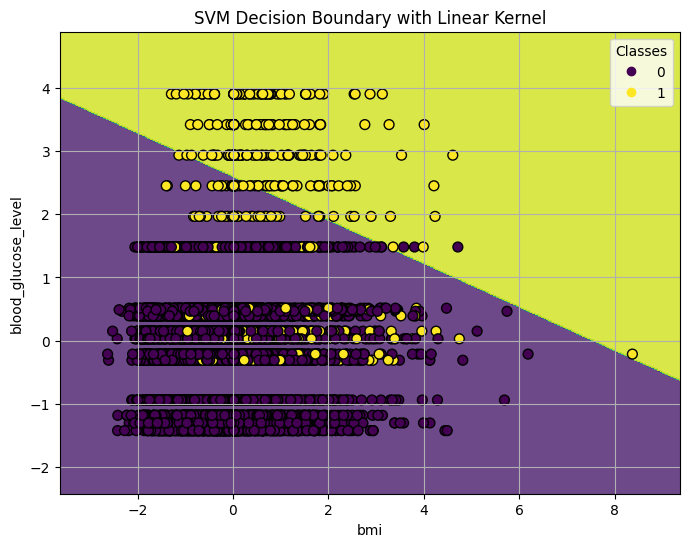

In [ ]:
# Plot for Linear Kernel
plot_decision_boundary(best_svm_linear, x_train, y_train, "SVM Decision Boundary with Linear Kernel")

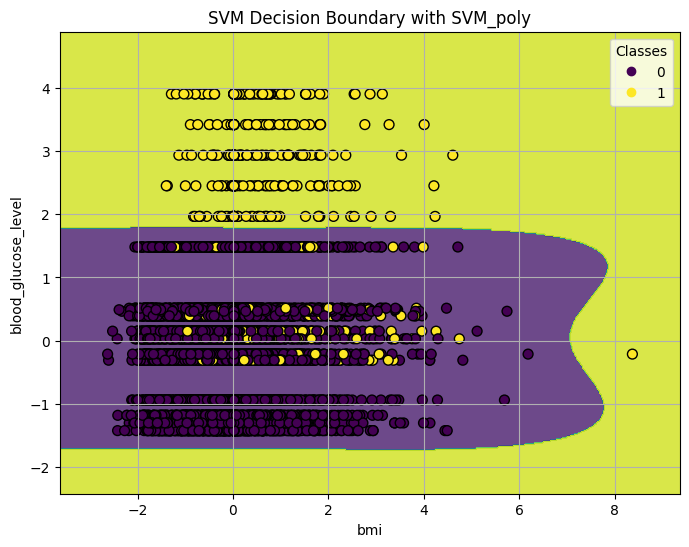

In [ ]:
# Plot for Polynomial Kernel
plot_decision_boundary(best_svm_poly, x_train, y_train, "SVM Decision Boundary with SVM_poly")

# Summary
We found that when applying SVM algorithm in our imbalance dataset, Polynomial Kernel shows:

*   Better handling of the minority class (class 1).
*   Increases recall and F1-score for the critical positive cases.
*   Captures non-linear relationships with small yet meaningful improvement in overall accuracy.
*   Produces more complex, curved boundaries in visualization.